## Game Metrics Calculations<

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing datasets
installs = pd.read_excel (r'Installs.xlsx', parse_dates = ['InstallDate'])
impressions = pd.read_excel (r'Impressions.xlsx', parse_dates = ['Date'])
ecpm = pd.read_excel (r'eCPM.xlsx', parse_dates = ['Date'])

### Cleaning and formatting the datasets

* impression table has zero value columns.When importing the table, cells with a value of zero were transferred as null.So I changed these cells back to zero value.
* The date column has been converted to the desired format. 
* Decimal numbers converted to desired format.

In [3]:
#formatting the date and number formats

#the function to format the date column MM/DD/YYYY
def date_format(dataframe,column):
    '''format the date column MM/DD/YYYY'''
    return dataframe[column].dt.strftime("%m/%d/%Y")

#formatting the date colums of dataframes
installs['InstallDate'] = date_format(installs,'InstallDate')
impressions['Date'] = date_format(impressions, 'Date')
ecpm['Date'] = date_format(ecpm, 'Date')

#round to 2 significant figures for decimals
ecpm['eCPM'] = ecpm['eCPM'].round(2)
impressions['Impressions'] = impressions['Impressions'].round(2)

#change null objects to zero 
impressions['Impressions'].fillna(0,inplace=True)

It was checked with the following code whether there are null values in the datasets. There are no null values.

In [4]:
ecpm.isnull().sum()

Date                 0
App                  0
CountryDashboard     0
PlatformDashboard    0
Format               0
eCPM                 0
dtype: int64

In [5]:
impressions.isnull().sum()

Date            0
Game            0
CountryName     0
PlatformName    0
AdFormat        0
Impressions     0
dtype: int64

In [25]:
installs.isnull().sum()

InstallDate             0
App_Country_Platform    0
UserCount               0
dtype: int64

**There are 3 tables that are related to each other.**
These tables have values 
that depend on the same categorical variables on the same date. 
In order to associate these tables with each other more easily, the values in their cells and column headings are arranged to be the same.
* there are 3 different type games,2 different type platforms and 4 different types countries.
* category types in ecpm and impressions dataframes have been changed according to the App_Country_Platform (e.g. Game X_de_google) column of the installs dataframe.

    columns:
    * game: Game X, Game Y, Game Z
    * platform: android,google
    * countries:DE - Germany , GB - Great Britain, United Kingdom, JP - Japan, US - United States of America
    * ad format:intersyitial , rewarded
* To merge it into the ecpm dataframe, the column headers have been changed to resemble the ecpm dataframe.

In [6]:
# Mapping for channels according to installs 

def column_format(dataframe,column,column_dict):
    '''code function to change cell values'''
    return dataframe[column].map(column_dict)


# ecpm name dictionaries : there are 3 different type games and 2 different type platforms.
ecpm_game_dict = {'Game_X':'Game X','Game_Y':'Game Y', 'Game_Z':'Game Z'}
ecpm_platform_dict = {'android':'google','ios':'itunes'}
    
# impressions name dictionaries
impressions_game_dict = {"GameX": "Game X", "GameY": "Game Y", "GameZ": "Game Z"}
impressions_platform_dict = {"Android": "google", "iOS": "itunes"}
impressions_country_dict = {'Germany': 'de' , 'Japan': 'jp', 'United Kingdom':'gb' , 
                            'United States':'us'}
impressions_ad_dict = {'Interstitial': 'interstitial' , 'Rewarded': 'rewarded'}

#changing the game,platform,country column cells similar to installs dataframe

ecpm['App'] = column_format(ecpm,'App',ecpm_game_dict)
ecpm['PlatformDashboard'] = column_format(ecpm,'PlatformDashboard',ecpm_platform_dict)
impressions['Game'] = column_format(impressions,'Game',impressions_game_dict)
impressions['PlatformName'] = column_format(impressions,'PlatformName',impressions_platform_dict)
impressions['CountryName'] = column_format(impressions,'CountryName',impressions_country_dict)
impressions['AdFormat'] = column_format(impressions,'AdFormat',impressions_ad_dict)

#changing the column name to merge all dataframes

column_names = ['Date','App','CountryDashboard','PlatformDashboard','Format','Impressions']
impressions.columns = column_names

column_names_installs = ['Date', 'App_Country_Platform','UserCount']
installs.columns = column_names_installs
#change null objects to zero 
impressions['Impressions'].fillna(0,inplace=True)

In [27]:
#the first 5 columns of install dataset
installs.head()


,Date,App_Country_Platform,UserCount
0,12/07/2020,Game X_de_google,30
1,12/07/2020,Game X_de_itunes,23
2,12/08/2020,Game X_de_google,38
3,12/08/2020,Game X_de_itunes,44
4,12/09/2020,Game X_de_google,20


In [28]:
#the first 5 columns of ecpm dataset
ecpm.head()


,Date,App,CountryDashboard,PlatformDashboard,Format,eCPM
0,12/07/2020,Game X,de,google,interstitial,18.66
1,12/07/2020,Game X,de,itunes,interstitial,10.57
2,12/07/2020,Game X,de,google,rewarded,48.85
3,12/07/2020,Game X,de,itunes,rewarded,50.17
4,12/08/2020,Game X,de,google,interstitial,32.36


In [8]:
#the first 5 columns of impressions dataset
impressions.head()


,Date,App,CountryDashboard,PlatformDashboard,Format,Impressions
0,12/07/2020,Game X,de,google,interstitial,526.11
1,12/07/2020,Game X,de,itunes,interstitial,552.50
2,12/07/2020,Game X,jp,google,interstitial,76.54
3,12/07/2020,Game X,jp,itunes,interstitial,1787.71
4,12/07/2020,Game X,gb,google,interstitial,995.20


### JOIN Dataframes

Before proceeding to the calculations , all data should be matched in a single table in order to be able to operate more easily. The numerical values corresponding to the date, game, platform and advertisement format will be combined in the entire table.

In [9]:
#merge dataframes impression to ecpm
ecpm_imp_merged = pd.merge(ecpm, impressions, how="left",\
                           on=['Date','App','CountryDashboard','PlatformDashboard','Format'])

#because some impression values are zero,when joinnind, function changed them to null objects. 
#change null onjects to zero again
ecpm_imp_merged['Impressions'].fillna(0,inplace=True)

#add column to merge install bu using App_Country_Platform column. İts beneficial to merge install dataframe.

ecpm_imp_merged['App_Country_Platform']=ecpm['App']+'_'+ecpm['CountryDashboard']+'_'+ecpm['PlatformDashboard']

#merge dataframes impression to ecpm_imp_merged dataframe
ecpm_imp_ins_merged = pd.merge(ecpm_imp_merged, installs, how="left",\
                               on=['Date','App_Country_Platform'])

#if you control how many null objects are there, there is no null objects. 
pd.isna(ecpm_imp_ins_merged).sum()

Date                    0
App                     0
CountryDashboard        0
PlatformDashboard       0
Format                  0
eCPM                    0
Impressions             0
App_Country_Platform    0
UserCount               0
dtype: int64

In [31]:
##the first 5 columns of impressions merged dataframe: this is the main table to calculate metrics.
ecpm_imp_ins_merged.head()

,Date,App,CountryDashboard,PlatformDashboard,Format,eCPM,Impressions,App_Country_Platform,UserCount
0,12/07/2020,Game X,de,google,interstitial,18.66,526.11,Game X_de_google,30
1,12/07/2020,Game X,de,itunes,interstitial,10.57,552.50,Game X_de_itunes,23
2,12/07/2020,Game X,de,google,rewarded,48.85,13.44,Game X_de_google,30
3,12/07/2020,Game X,de,itunes,rewarded,50.17,25.80,Game X_de_itunes,23
4,12/08/2020,Game X,de,google,interstitial,32.36,1222.10,Game X_de_google,38


* We now have eCPM, impression and user count values that have been correspond to the same categorical data for all days. I will use this table generally to calculate the metrics.
* It is necessary to calculate the metrics according to the each game. I will split the dataframe by games.
* After splitting the table by each game, we will create pivot tables and calculate the metrics.
**In this section, int index is used for interstitial and rew index is used for rewarded.*

**Calculating ImpU(Int)&ImpU(Rew)**
* Interstitials impressions per user : I devided impression by number of users for each row. Then I calculated the mean for each game. 
* Since it is important to examine the calculated values according to the characteristics of the users, I analyzed them by breaking them on the basis of countries and platforms with a chart.
* Finally, I graphically examined the time-dependent change of the Interstitials impressions per user value for each game.

In [10]:
#the function to calculate ImpU
def impu(df):
    return df['Impressions']/df['UserCount']
#the function to calculate Revenue
def rev(df):
    return df['Impressions']*df['eCPM']/1000
    

In [11]:
#ImpU(Int) for Game X
gamex_int=ecpm_imp_ins_merged[(ecpm_imp_ins_merged['App']=='Game X') &\
                              (ecpm_imp_ins_merged['Format']=='interstitial')]
gamex_int['ImpU']=impu(gamex_int)
gamex_int=gamex_int.groupby(['CountryDashboard','PlatformDashboard'])['ImpU'].mean().reset_index()

#ImpU(Int) for Game Y
gamey_int=ecpm_imp_ins_merged[(ecpm_imp_ins_merged['App']=='Game Y') &\
                              (ecpm_imp_ins_merged['Format']=='interstitial')]
gamey_int['ImpU']=impu(gamey_int)
gamey_int=gamey_int.groupby(['CountryDashboard','PlatformDashboard'])['ImpU'].mean().reset_index()


#ImpU(Int) for Game Z
gamez_int=ecpm_imp_ins_merged[(ecpm_imp_ins_merged['App']=='Game Z') &\
                              (ecpm_imp_ins_merged['Format']=='interstitial')]
gamez_int['ImpU']=impu(gamez_int)
gamez_int=gamez_int.groupby(['CountryDashboard','PlatformDashboard'])['ImpU'].mean().reset_index()

Interstitials impressions per user of Game X =:16.863463831745772
Interstitials impressions per user of Game Y =:6.069456287687945
Interstitials impressions per user of Game Z =:6.069456287687945


CountryDashboard                 de         gb         jp         us
PlatformDashboard App                                               
google            Game X  17.467659  12.216829  18.904055   8.320594
                  Game Y   9.742517   2.676447   7.402045   4.759024
                  Game Z   4.433773   7.441707   4.705595   4.357301
itunes            Game X  20.209960  29.919492  14.078048  13.791075
                  Game Y   6.441390   7.681073   5.498958   4.354197
                  Game Z  18.399172  11.518889  17.205717  13.080747

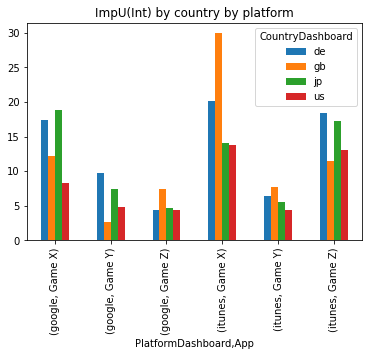

In [13]:
game_int=ecpm_imp_ins_merged[ecpm_imp_ins_merged['Format']=='interstitial']
game_int['ImpU']=impu(game_int)
game_int=game_int.groupby(['CountryDashboard','PlatformDashboard','App'])['ImpU'].mean().reset_index()
game_int_pivot=game_int.pivot(index=['PlatformDashboard','App'], columns=['CountryDashboard'], values='ImpU')
game_int_pivot.plot(kind='bar')
plt.title('ImpU(Int) by country by platform')
print('Interstitials impressions per user of Game X =:'+str(gamex_int['ImpU'].mean()))  #calculates the mean of ImpU
print('Interstitials impressions per user of Game Y =:'+str(gamey_int['ImpU'].mean()))
print('Interstitials impressions per user of Game Z =:'+str(gamey_int['ImpU'].mean()))
game_int_pivot


* The game with the most Interstitials impressions per user value is X. But this is a general approach, in fact, it is necessary to examine it according to countries and other categorical variables.

* If there were more countries then they could be grouped and analyzed by geography. In addition, the change of these values can be examined weekly or monthly in a longer-term data.

* According to the bar graph above, the ImpU value of game x in countries varies according to the app platform. For example, Interstitials impressions per user is high in United Kingdom for ios, while Japan is high for android. It may also have something to do with the technology used in countries. Accordingly, the changes to be made for imression may be differentiated for these two platforms.

App,Game X,Game Y,Game Z
Date,,,
12/07/2020,187.542153,68.172816,99.387934
12/08/2020,153.011699,36.272377,88.899734
12/09/2020,95.303749,61.835327,89.375571
12/10/2020,167.765823,62.885697,59.729460
12/11/2020,112.641268,38.537398,102.888249
12/12/2020,135.472701,29.103155,78.667533
12/13/2020,92.616582,43.082782,49.051824


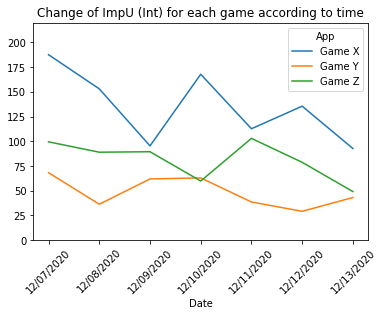

In [14]:
game_int_time=ecpm_imp_ins_merged[ecpm_imp_ins_merged['Format']=='interstitial']
game_int_time['ImpU']=impu(game_int_time)
game_int_time=game_int_time.groupby(['Date','App'])['ImpU'].sum().reset_index()
game_int_time_pivot=game_int_time.pivot(index=['Date'], columns=['App'], values='ImpU')
game_int_time_pivot.plot()
plt.title('Change of ImpU (Int) for each game according to time')
plt.xticks(rotation = 45)
plt.ylim([0, 220])
game_int_time_pivot

* Interstitials impressions per user is bigger than rewarded impressions per user. Like ImpU(Int), the ImpU(Rew) value of game x in countries varies according to the app platform.
* Android users showed a different behavior compared to rewarded impressin instertial. According to the countries, the display has changed as in the graphic. This time Germany instead of Japan has the highest value.

**Calculations for Rewarded impressions per user**:
All calculations and visualizations for Interstitial were also done for rewarded this time.

In [15]:
#ImpU(Int) for Game X
gamex_rew=ecpm_imp_ins_merged[(ecpm_imp_ins_merged['App']=='Game X') &\
                              (ecpm_imp_ins_merged['Format']=='rewarded')]
gamex_rew['ImpU']=impu(gamex_rew)
gamex_rew=gamex_rew.groupby(['CountryDashboard','PlatformDashboard'])['ImpU'].sum().reset_index()

#ImpU(Int) for Game Y
gamey_rew=ecpm_imp_ins_merged[(ecpm_imp_ins_merged['App']=='Game Y') &\
                              (ecpm_imp_ins_merged['Format']=='rewarded')]
gamey_rew['ImpU']=impu(gamey_rew)
gamey_rew=gamey_rew.groupby(['CountryDashboard','PlatformDashboard'])['ImpU'].sum().reset_index()


#ImpU(Int) for Game Z
gamez_rew=ecpm_imp_ins_merged[(ecpm_imp_ins_merged['App']=='Game Z') &\
                              (ecpm_imp_ins_merged['Format']=='rewarded')]
gamez_rew['ImpU']=impu(gamez_rew)
gamez_rew=gamez_rew.groupby(['CountryDashboard','PlatformDashboard'])['ImpU'].sum().reset_index()

Interstitials impressions per user of Game X =:3.7906609985794995
Interstitials impressions per user of Game Y =:11.366956671076839
Interstitials impressions per user of Game Z =:11.366956671076839


CountryDashboard                 de         gb         jp         us
PlatformDashboard App                                               
google            Game X   4.876967   2.233283   1.962760   2.153895
                  Game Y   7.795790   5.753510  11.427346   5.621476
                  Game Z   1.687544   1.708958   4.481074   2.147035
itunes            Game X   5.008689   8.212535   2.641603   3.235555
                  Game Y  23.280078  19.922566   9.067806   8.067081
                  Game Z   6.158862   6.782427   7.166755  12.037926

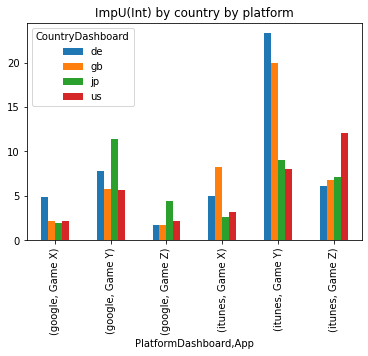

In [16]:
game_rew=ecpm_imp_ins_merged[ecpm_imp_ins_merged['Format']=='rewarded']
game_rew['ImpU']=impu(game_rew)
game_rew=game_rew.groupby(['CountryDashboard','PlatformDashboard','App'])['ImpU'].sum().reset_index()
game_rew_pivot=game_rew.pivot(index=['PlatformDashboard','App'], columns=['CountryDashboard'], values='ImpU')
game_rew_pivot.plot(kind='bar')
print('Interstitials impressions per user of Game X =:'+str(gamex_rew['ImpU'].mean()))
print('Interstitials impressions per user of Game Y =:'+str(gamey_rew['ImpU'].mean()))
print('Interstitials impressions per user of Game Z =:'+str(gamey_rew['ImpU'].mean()))
plt.title('ImpU(Int) by country by platform')
game_rew_pivot



App,Game X,Game Y,Game Z
Date,,,
12/07/2020,5.259046,29.568611,6.461021
12/08/2020,5.047185,11.057857,9.354737
12/09/2020,5.049238,15.280676,5.224846
12/10/2020,2.957139,11.278635,6.060915
12/11/2020,3.075384,10.047180,6.239887
12/12/2020,4.152770,6.957917,6.109049
12/13/2020,4.784526,6.744778,2.720126


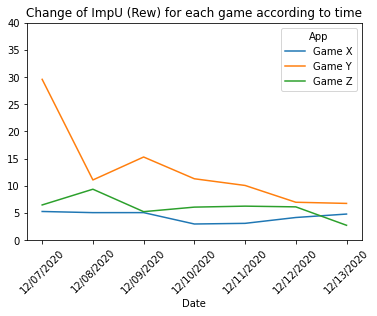

In [17]:
game_rew_time=ecpm_imp_ins_merged[ecpm_imp_ins_merged['Format']=='rewarded']
game_rew_time['ImpU']=impu(game_rew_time)
game_rew_time=game_rew_time.groupby(['Date','App'])['ImpU'].sum().reset_index()
game_rew_time_pivot=game_rew_time.pivot(index=['Date'], columns=['App'], values='ImpU')
game_rew_time_pivot.plot()
plt.title('Change of ImpU (Rew) for each game according to time')
plt.xticks(rotation = 45)
plt.ylim([0, 40])
game_rew_time_pivot


**Estimated revenue:** Est_Revenue =  InterstitialCount * eCPM (Int) + RewardedCount*eCPM (Rew)

CountryDashboard,de,gb,jp,us,Total
App,,,,,
Game X,400.13,982.59,550.69,14909.98,16843.39
Game Y,2247.30,1733.74,1606.88,13626.35,19214.27
Game Z,1004.76,6107.75,2363.60,61777.00,71253.11
Total,3652.19,8824.08,4521.17,90313.33,107310.77


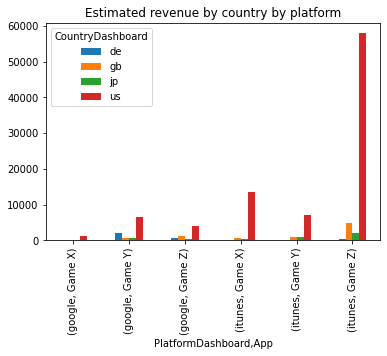

In [71]:
game_rev=ecpm_imp_ins_merged
game_rev['Revenue'] = game_rev['Impressions']*game_rev['eCPM']/1000
game_rev =game_rev.groupby(['CountryDashboard','PlatformDashboard','Format','App'])['Revenue'].sum().round(2).reset_index()
game_rev=game_rev.pivot(columns='Format',index=['CountryDashboard','PlatformDashboard','App'] , values=['Revenue']).round(2).reset_index()
game_rev['EstimatedRevenue'] = (game_rev[('Revenue','interstitial')] + game_rev[('Revenue','rewarded')]).round(2)
del game_rev['Revenue']
game_rev=game_rev.groupby(['App','CountryDashboard'])['EstimatedRevenue'].sum().reset_index()

game_rev=game_rev.pivot_table(values='EstimatedRevenue', index = 'App', \
                              columns= 'CountryDashboard', \
                              aggfunc= 'sum', \
                              margins = True, margins_name='Total')

game_rev_pivot.plot(kind='bar')
plt.title('Estimated revenue by country by platform')

game_rev

In [ ]:
_pivot=game_rev.pivot(index=['PlatformDashboard','App'],columns='CountryDashboard',values='EstimatedRevenue')
game_rev_pivot.plot(kind='bar')
plt.title('Estimated revenue by country by platform')
game_rev_pivot

the highest estimated revenue valuse is in USA, let's look at the table again for United States:

In [19]:
gamex=ecpm_imp_ins_merged[(ecpm_imp_ins_merged['App']=='Game X') & (ecpm_imp_ins_merged['CountryDashboard']=='us')]
del gamex['CountryDashboard']
del gamex['PlatformDashboard']
gamex

,Date,App,Format,eCPM,Impressions,App_Country_Platform,UserCount,Revenue
93,12/07/2020,Game X,interstitial,78.81,4937.68,Game X_us_google,234,389.138561
94,12/07/2020,Game X,interstitial,117.15,20957.40,Game X_us_itunes,1984,2455.159410
95,12/07/2020,Game X,rewarded,134.38,133.34,Game X_us_google,234,17.918229
96,12/07/2020,Game X,rewarded,92.97,1100.97,Game X_us_itunes,1984,102.357181
97,12/07/2020,Game X,unclassified,0.00,0.00,Game X_us_itunes,1984,0.000000
98,12/08/2020,Game X,interstitial,74.23,1492.64,Game X_us_google,228,110.798667
99,12/08/2020,Game X,interstitial,96.10,26258.04,Game X_us_itunes,1551,2523.397644
100,12/08/2020,Game X,rewarded,72.31,97.20,Game X_us_google,228,7.028532
101,12/08/2020,Game X,rewarded,108.77,87.67,Game X_us_itunes,1551,9.535866
102,12/08/2020,Game X,unclassified,8.40,0.00,Game X_us_itunes,1551,0.000000


* The number of users and impressions in United States is too high for iOS. Even when we compare it with rewarded, it remains very high both according to rewarded and compared to other countries. Because the number of users is very high, the impression is also very high, so the revenue is very high.

**Average estimated revenue per user: ARPU**
* eCPM is used to refer to revenue per thousand impressions. So I multiplied the impression by the eCPM and divided by 1000 to calculate the reveneu for each line. To calculate ARPU, I divided revenue by the number of users.
* Like before I did, I calculated both the single value for each game and their values by country and platforms.

CountryDashboard            de    gb    jp    us
PlatformDashboard App                           
google            Game X  3.53  3.29  7.85  3.64
                  Game Y  2.14  0.69  3.17  1.71
                  Game Z  1.23  1.75  1.97  1.43
itunes            Game X  4.65  7.82  4.81  8.48
                  Game Y  2.70  2.63  4.38  2.03
                  Game Z  3.77  2.51  6.18  6.32

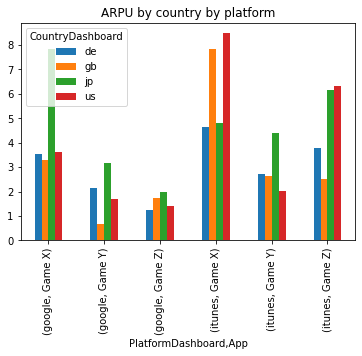

In [20]:
game_arpu=ecpm_imp_ins_merged
game_arpu['Revenue'] = game_arpu['Impressions']*game_arpu['eCPM']/1000
game_arpu['ARPU'] = game_arpu['Revenue']/game_arpu['UserCount']

game_arpu =game_arpu.groupby(['CountryDashboard','PlatformDashboard','App'])['ARPU'].sum().round(2).reset_index()
game_arpu_pivot=game_arpu.pivot(index=['PlatformDashboard','App'] , columns=['CountryDashboard'], values='ARPU').round(2)
game_arpu_pivot.plot(kind='bar')
plt.title('ARPU by country by platform')
game_arpu_pivot

In [24]:
print('ARPU for each game:\n' +str(game_arpu.groupby('App')['ARPU'].mean()))

ARPU for each game:
App
Game X    5.50875
Game Y    2.43125
Game Z    3.14500
Name: ARPU, dtype: float64


### Maximum eCPM: Max_eCPM

In [47]:
game_groups =ecpm_imp_ins_merged[ecpm_imp_ins_merged['eCPM']>0]
max_ecpm=game_groups.groupby(['CountryDashboard','App'])['eCPM'].max().round(2).reset_index()
print('Max eCPM for each game in each country')
max_ecpm


Max eCPM for each game in each country


,CountryDashboard,App,eCPM
0,de,Game X,67.45
1,de,Game Y,86.56
2,de,Game Z,77.31
3,gb,Game X,130.17
4,gb,Game Y,81.55
5,gb,Game Z,100.44
6,jp,Game X,151.38
7,jp,Game Y,205.86
8,jp,Game Z,152.44
9,us,Game X,134.38


In [48]:
min_ecpm=game_groups.groupby(['CountryDashboard','App'])['eCPM'].min().round(2).reset_index()
print('Min eCPM for each game in each country')
min_ecpm

Min eCPM for each game in each country


,CountryDashboard,App,eCPM
0,de,Game X,10.57
1,de,Game Y,7.78
2,de,Game Z,8.12
3,gb,Game X,5.94
4,gb,Game Y,6.73
5,gb,Game Z,15.68
6,jp,Game X,5.09
7,jp,Game Y,12.06
8,jp,Game Z,10.51
9,us,Game X,1.79


**Average number of users for last 3 days:** Ro3_Avr_Users. : I calculated not only the las 3 days but also running values for each day.

App,Ro3_Avr_Users_Game X,Ro3_Avr_Users_Game Y,Ro3_Avr_Users_Game Z
Date,,,
12/07/2020,NaN,NaN,NaN
12/08/2020,NaN,NaN,NaN
12/09/2020,6355.000000,20071.000000,28940.333333
12/10/2020,7088.000000,21889.333333,34020.000000
12/11/2020,7872.000000,23248.000000,35316.000000
12/12/2020,7776.333333,30506.000000,37279.000000
12/13/2020,7157.000000,34660.333333,62576.000000


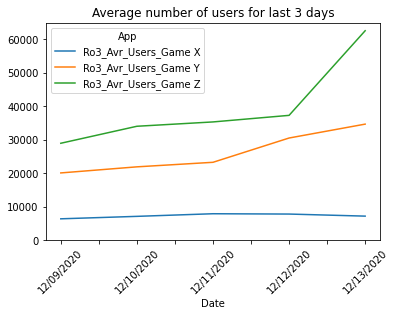

In [27]:
game_users=ecpm_imp_ins_merged.groupby(['Date','App'])['UserCount'].sum().reset_index()
game_users=game_users.pivot(index='Date',columns='App',values='UserCount')

game_users['Ro3_Avr_Users_Game X'] = game_users['Game X'].rolling(window=3,center=False).mean()
game_users['Ro3_Avr_Users_Game Y'] = game_users['Game Y'].rolling(window=3,center=False).mean()
game_users['Ro3_Avr_Users_Game Z'] = game_users['Game Z'].rolling(window=3,center=False).mean()
del [game_users['Game X'],game_users['Game Y'], game_users['Game Z']]
game_users.plot()
plt.title('Average number of users for last 3 days')
plt.xticks(rotation = 45)
plt.ylim([0, 65000])
game_users



* According to the chart, there is an increase in the average of the last three days for Game Z and Game Y. The reason that triggered the increase should be examined here. There may be an increase in advertising in certain user groups, such as an additional update to the application. In addition, it can be viewed by platform and country. I think it is necessary to look at what triggered this increase.

* similarly, there is a stable or even decline for game x. Here, too, the performance of the game should be examined in detail.

**Average number of users of previous week: Pw_Avr_Users** I couldn't figure out how to subtract the previous week because there is one week in the data.

### Visualization

ecpm_imp_ins_merged dataframe created before has been used.

#### Number of installs

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '(12/13/2020, itunes)'),
  Text(0.0, 0, '(12/07/2020, itunes)'),
  Text(1.0, 0, '(12/08/2020, itunes)'),
  Text(2.0, 0, '(12/09/2020, itunes)'),
  Text(3.0, 0, '(12/10/2020, itunes)'),
  Text(4.0, 0, '(12/11/2020, itunes)'),
  Text(5.0, 0, '(12/12/2020, itunes)'),
  Text(6.0, 0, '(12/13/2020, itunes)'),
  Text(7.0, 0, '')])

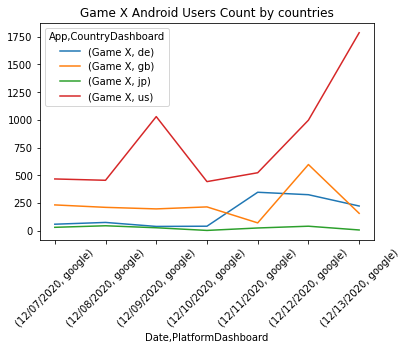

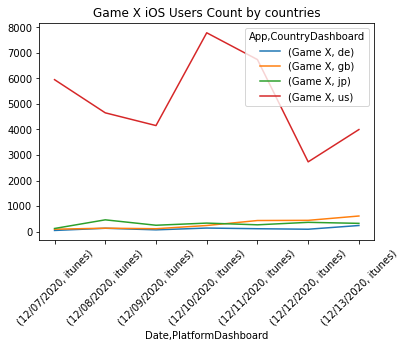

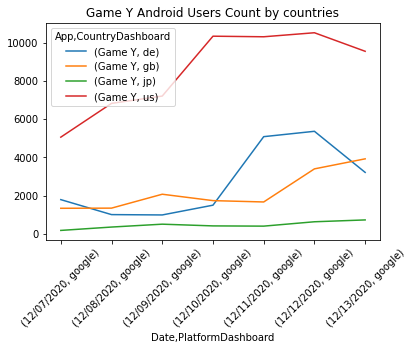

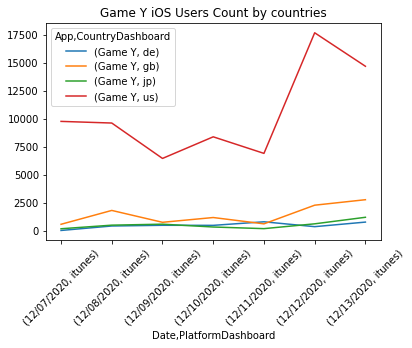

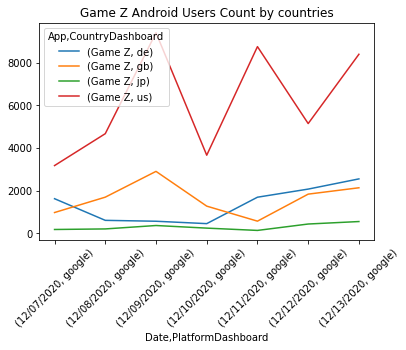

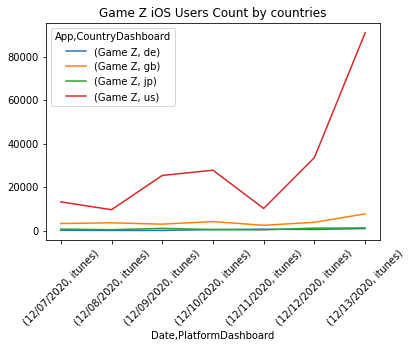

In [35]:
user_counts=ecpm_imp_ins_merged.groupby(['Date','App','CountryDashboard','PlatformDashboard'])['UserCount'].sum().reset_index()
user_counts_game_x_google=user_counts[(user_counts['App']=='Game X')&(user_counts['PlatformDashboard']=='google')].pivot(columns=['App','CountryDashboard'], index=['Date','PlatformDashboard'],values='UserCount')
user_counts_game_x_itunes=user_counts[(user_counts['App']=='Game X')&(user_counts['PlatformDashboard']=='itunes')].pivot(columns=['App','CountryDashboard'], index=['Date','PlatformDashboard'],values='UserCount')
user_counts_game_y_google=user_counts[(user_counts['App']=='Game Y')&(user_counts['PlatformDashboard']=='google')].pivot(columns=['App','CountryDashboard'], index=['Date','PlatformDashboard'],values='UserCount')
user_counts_game_y_itunes=user_counts[(user_counts['App']=='Game Y')&(user_counts['PlatformDashboard']=='itunes')].pivot(columns=['App','CountryDashboard'], index=['Date','PlatformDashboard'],values='UserCount')
user_counts_game_z_google=user_counts[(user_counts['App']=='Game Z')&(user_counts['PlatformDashboard']=='google')].pivot(columns=['App','CountryDashboard'], index=['Date','PlatformDashboard'],values='UserCount')
user_counts_game_z_itunes=user_counts[(user_counts['App']=='Game Z')&(user_counts['PlatformDashboard']=='itunes')].pivot(columns=['App','CountryDashboard'], index=['Date','PlatformDashboard'],values='UserCount')



user_counts_game_x_google.plot()
plt.title('Game X Android Users Count by countries over time')
plt.xticks(rotation = 45)
user_counts_game_x_itunes.plot()
plt.title('Game X iOS Users Count by countries over time')
plt.xticks(rotation = 45)
user_counts_game_y_google.plot()
plt.title('Game Y Android Users Count by countries over time')
plt.xticks(rotation = 45)
user_counts_game_y_itunes.plot()
plt.title('Game Y iOS Users Count by countries over time')
plt.xticks(rotation = 45)
user_counts_game_z_google.plot()
plt.title('Game Z Android Users Count by countries over time')
plt.xticks(rotation = 45)
user_counts_game_z_itunes.plot()
plt.title('Game Z iOS Users Count by countries over time')
plt.xticks(rotation = 45)


#gamex_de=ecpm_imp_ins_merged[(ecpm_imp_ins_merged['App']=='Game X')&(ecpm_imp_ins_merged['CountryDashboard']=='de')]
#gamex_de

#### Avarage eCPM

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '12/13/2020'),
  Text(0.0, 0, '12/07/2020'),
  Text(1.0, 0, '12/08/2020'),
  Text(2.0, 0, '12/09/2020'),
  Text(3.0, 0, '12/10/2020'),
  Text(4.0, 0, '12/11/2020'),
  Text(5.0, 0, '12/12/2020'),
  Text(6.0, 0, '12/13/2020'),
  Text(7.0, 0, '')])

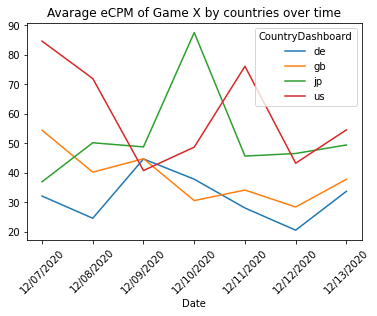

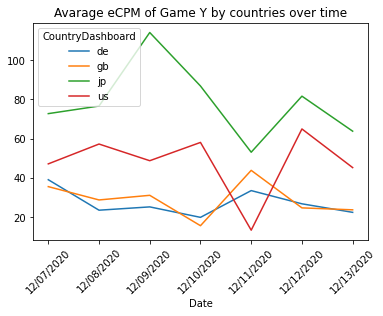

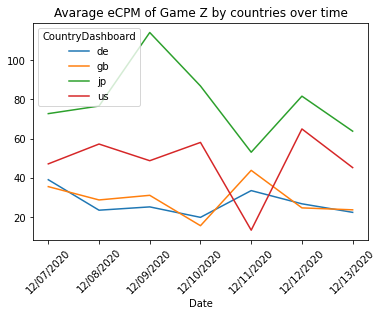

In [61]:
ecpm=ecpm_imp_ins_merged
avg_ecpm=ecpm.groupby(['Date','App','CountryDashboard'])['eCPM'].mean().reset_index()
avg_ecpm_x=avg_ecpm[avg_ecpm['App']=='Game X'].pivot(index=['Date'],columns='CountryDashboard', values='eCPM')
avg_ecpm_y=avg_ecpm[avg_ecpm['App']=='Game Y'].pivot(index=['Date'],columns='CountryDashboard', values='eCPM')
avg_ecpm_z=avg_ecpm[avg_ecpm['App']=='Game Z'].pivot(index=['Date'],columns='CountryDashboard', values='eCPM')



avg_ecpm_x.plot()
plt.title('Avarage eCPM of Game X by countries over time')
plt.xticks(rotation = 45)
avg_ecpm_y.plot()
plt.title('Avarage eCPM of Game Y by countries over time')
plt.xticks(rotation = 45)
avg_ecpm_y.plot()
plt.title('Avarage eCPM of Game Z by countries over time')
plt.xticks(rotation = 45)
